# Exploratory Data Analysis (EDA)

## Set up

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import re
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn2
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
PATH = Path.cwd().parents[0]
DATA_PATH = os.path.join(PATH, 'data')
SAVE_PATH = os.path.join(DATA_PATH, 'labeled')
TMP_PATH = os.path.join(DATA_PATH, 'unlabeled')

## Load Data

In [4]:
# CRPWarner
EXTERNAL_PATH = os.path.join(DATA_PATH, 'external')
CRP_PATH = os.path.join(EXTERNAL_PATH, 'crpwarner/dataset')
crp_ground_df = pd.read_excel(os.path.join(CRP_PATH, 'groundtruth/groundTruth.xlsx'))
CRP_LARGE_PATH = os.path.join(CRP_PATH, 'large/sample')
mint_df = pd.read_excel(os.path.join(CRP_LARGE_PATH, 'mint.xlsx'))
leak_df = pd.read_excel(os.path.join(CRP_LARGE_PATH, 'leak.xlsx'))
limit_df = pd.read_excel(os.path.join(CRP_LARGE_PATH, 'limit.xlsx'))

# RPHunter
RP_PATH = os.path.join(EXTERNAL_PATH, 'rphunter')
rphunter_total_df = pd.read_excel(os.path.join(RP_PATH, 'Rug-Pull-Incidents.xlsx'), sheet_name='Total')
rphunter_experiment_df = pd.read_excel(os.path.join(RP_PATH, 'Rug-Pull-Incidents.xlsx'), sheet_name='Experiment')

# Trapdoor
TRAP_PATH = os.path.join(EXTERNAL_PATH, 'trapdoordata')
trapdoor_verified_df = pd.read_csv(os.path.join(TRAP_PATH, 'verified_dataset.csv'))
trapdoor_expansion_df = pd.read_csv(os.path.join(TRAP_PATH, 'expansion_dataset.csv'))
TRAP_LABEL_PATH = os.path.join(TRAP_PATH, 'feature_dataset')
trapdoor_al_df = pd.read_csv(os.path.join(TRAP_LABEL_PATH, 'AL_opcode_feature_dataset.csv'))
trapdoor_ep_df = pd.read_csv(os.path.join(TRAP_LABEL_PATH, 'EP_opcode_feature_dataset.csv'))
trapdoor_es_df = pd.read_csv(os.path.join(TRAP_LABEL_PATH, 'ES_opcode_feature_dataset.csv'))
trapdoor_exchange_df = pd.read_csv(os.path.join(TRAP_LABEL_PATH, 'exchange_feature_dataset.csv'))
trapdoor_fm_df = pd.read_csv(os.path.join(TRAP_LABEL_PATH, 'FM_opcode_feature_dataset.csv'))
trapdoor_ic_df = pd.read_csv(os.path.join(TRAP_LABEL_PATH, 'IC_opcode_feature_dataset.csv'))
trapdoor_opcode_df = pd.read_csv(os.path.join(TRAP_LABEL_PATH, 'opcode_feature_dataset.csv'))


## Inspecting the Data

### CRPWarner

#### Groundtruth

In [5]:
crp_ground_df.head()

,address,Mint,Leak,Limit
0,0x93023F1D3525E273F291B6f76d2F5027A39BF302,1,0,1
1,0x2753dcE37A7eDB052a77832039bcc9aA49Ad8b25,0,0,1
2,0x94b7D24552933F50A5A5705C446528806dCeA381,0,0,0
3,0xE0b9d4146AaD6936cBfcBE4dAE47e34aAb96b093,0,0,0
4,0x10f6f2b97F3aB29583D9D38BaBF2994dF7220C21,1,0,1


In [6]:
crp_ground_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  69 non-null     object
 1   Mint     69 non-null     int64 
 2   Leak     69 non-null     int64 
 3   Limit    69 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.3+ KB


In [7]:
crp_ground_df.describe()

,Mint,Leak,Limit
count,69.000000,69.000000,69.000000
mean,0.289855,0.130435,0.434783
std,0.457019,0.339248,0.499360
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [8]:
crp_ground_df.duplicated().sum()

0

##### Bar Plot of Multi-Label Frequency

In [9]:
label_counts = crp_ground_df[["Mint", "Leak", "Limit"]].sum()
label_counts

Mint     20
Leak      9
Limit    30
dtype: int64

<Axes: xlabel='None'>

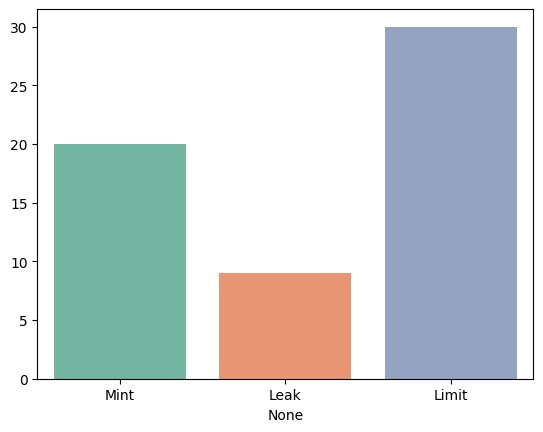

In [10]:
sns.barplot(x=label_counts.index, y=label_counts.values, palette="Set2")

##### Plot Count of Label Combinations

In [11]:
crpwarner_labels = ['Mint', 'Leak', 'Limit']
combine_df = pd.DataFrame({})
# Convert one-hot columns to label strings
def get_labels(row):
    return ','.join([
        label for label in crpwarner_labels
        if row[label] == 1
    ])

combine_df['label_combo'] = crp_ground_df.apply(get_labels, axis=1)
combine_df['label_combo'] = combine_df['label_combo'].replace('', 'None')  # Replace empty with 'None'
# Count combinations
combo_counts = combine_df['label_combo'].value_counts()
combo_counts

label_combo
None               27
Limit              15
Mint,Limit         10
Mint                8
Leak,Limit          4
Leak                3
Mint,Leak           1
Mint,Leak,Limit     1
Name: count, dtype: int64

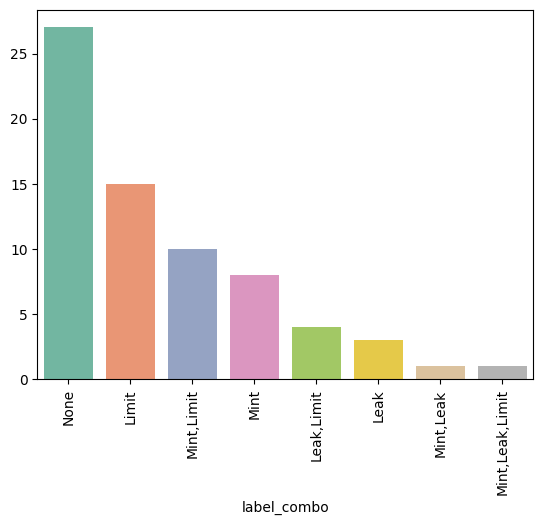

In [12]:
sns.barplot(x=combo_counts.index, y=combo_counts.values, palette="Set2")
plt.xticks(rotation=90)
plt.show()

#### Mint

In [13]:
mint_df.head()

,Address,TP?
0,0x0fef20d2c4ee011fa0389e69e9fa92a2291b63c8,Yes
1,0xd7cc0deb9dd11be95068bf2d7a3d082b8ba9bf04,Yes
2,0xa1b756be589441519b1a08e16bc4f60ab177d916,Yes
3,0x514bc174df04a4b04ae2be81ee8c788c3796b06b,Yes
4,0x1354c8c1a66c2573ce9cc3e92e98d17869501a46,Yes


In [14]:
mint_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Address  92 non-null     object
 1   TP?      92 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


In [15]:
mint_df.describe()

,Address,TP?
count,92,92
unique,92,2
top,0xebd55da9de25d071369130270de9fad62a12f5e6,Yes
freq,1,78


In [16]:
mint_df.duplicated().sum()

0

In [17]:
mint_df['TP?'].value_counts()

TP?
Yes    78
No     14
Name: count, dtype: int64

<Axes: xlabel='TP?', ylabel='count'>

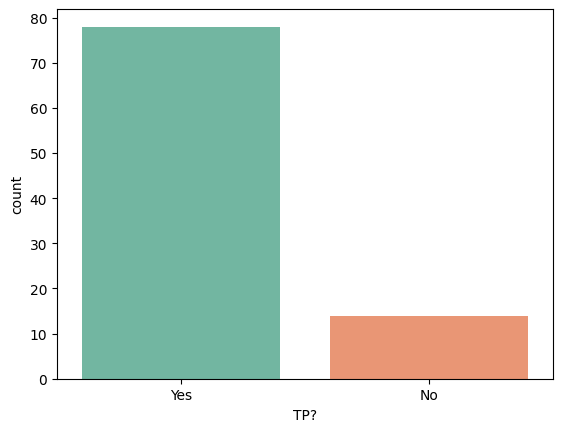

In [18]:
sns.countplot(mint_df, x='TP?', palette="Set2")

#### Leak

In [19]:
leak_df.head()

,Address,TP?
0,0x0290ea3c728981725689187763f6c63a68e192b8,Yes
1,0x054ad3cd4a66f14bf5c0de2548a53be66995a4f6,Yes
2,0x0566c17dc2a9efcaa2f63e04cf06a69e8fc77f60,No
3,0x10c8324b20b7266c445944f043f53f6a77ea0bd4,Yes
4,0x10cc060f6f9b2e5dcdb23f1361e4b368a7daec73,Yes


In [20]:
leak_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Address  88 non-null     object
 1   TP?      88 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


In [21]:
leak_df.describe()

,Address,TP?
count,88,88
unique,87,2
top,0x99d3dcf7febd2bb968b3fe7baa1a9a36546d9293,Yes
freq,2,74


In [22]:
leak_df.duplicated().sum()

1

In [23]:
leak_df = leak_df.drop_duplicates(keep='first')

In [24]:
leak_df['TP?'].value_counts()

TP?
Yes    74
No     13
Name: count, dtype: int64

<Axes: xlabel='TP?', ylabel='count'>

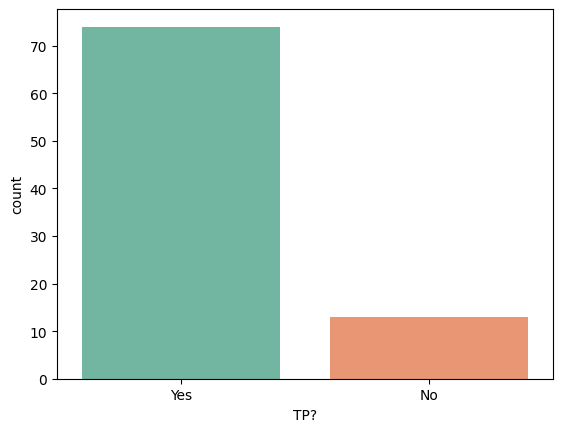

In [25]:
sns.countplot(leak_df, x='TP?', palette="Set2")

#### Limit

In [26]:
limit_df.head()

,Address,TP?
0,0xe5f3c6d2b47cbe2cf936b9521466bac2422ebef8,Yes
1,0xa623b5a542c0d7daadef321042a04c600b03a8cb,Yes
2,0xe412189da2dfa188a1a61633114b8732bbbfba19,Yes
3,0x9fcf7acdc11fd904c4b73a009909c7f00efc4844,Yes
4,0x921a5dce3dfed5cccfbb2e593f2978533bc66110,Yes


In [27]:
limit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Address  92 non-null     object
 1   TP?      92 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


In [28]:
limit_df.describe()

,Address,TP?
count,92,92
unique,91,2
top,0x61c3ee9ce25e2c88dc9a8dd98f0510b95a82397a,Yes
freq,2,79


In [29]:
limit_df.duplicated().sum()

1

In [30]:
limit_df = limit_df.drop_duplicates(keep='first')

In [31]:
limit_df['TP?'].value_counts()

TP?
Yes    78
No     13
Name: count, dtype: int64

<Axes: xlabel='TP?', ylabel='count'>

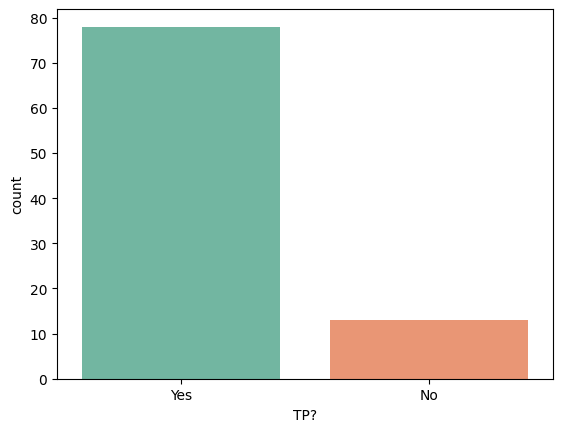

In [32]:
sns.countplot(limit_df, x='TP?', palette="Set2")

#### Modify Data

In [33]:
crp_ground_df = crp_ground_df.rename(columns={
  'address': 'Address'
})
crp_ground_df['Address'] = crp_ground_df['Address'].str.lower()
crp_ground_df.to_csv(os.path.join(SAVE_PATH, 'groundtruth.csv'), index=False)

In [34]:
mint_df['Address'] = mint_df['Address'].str.lower()
df_encoded = pd.get_dummies(mint_df, columns=['TP?'], drop_first=True)
mint_df['TP?'] = df_encoded['TP?_Yes'].astype(int)
mint_df = mint_df.rename(columns={'TP?': 'Mint'})
mint_df.head()


,Address,Mint
0,0x0fef20d2c4ee011fa0389e69e9fa92a2291b63c8,1
1,0xd7cc0deb9dd11be95068bf2d7a3d082b8ba9bf04,1
2,0xa1b756be589441519b1a08e16bc4f60ab177d916,1
3,0x514bc174df04a4b04ae2be81ee8c788c3796b06b,1
4,0x1354c8c1a66c2573ce9cc3e92e98d17869501a46,1


In [35]:
leak_df['Address'] = leak_df['Address'].str.lower()
df_encoded = pd.get_dummies(leak_df, columns=['TP?'], drop_first=True)
leak_df['TP?'] = df_encoded['TP?_Yes'].astype(int)
leak_df = leak_df.rename(columns={'TP?': 'Leak'})
leak_df.head()


,Address,Leak
0,0x0290ea3c728981725689187763f6c63a68e192b8,1
1,0x054ad3cd4a66f14bf5c0de2548a53be66995a4f6,1
2,0x0566c17dc2a9efcaa2f63e04cf06a69e8fc77f60,0
3,0x10c8324b20b7266c445944f043f53f6a77ea0bd4,1
4,0x10cc060f6f9b2e5dcdb23f1361e4b368a7daec73,1


In [36]:
limit_df['Address'] = limit_df['Address'].str.lower()
df_encoded = pd.get_dummies(limit_df, columns=['TP?'], drop_first=True)
limit_df['TP?'] = df_encoded['TP?_Yes'].astype(int)
limit_df = limit_df.rename(columns={'TP?': 'Limit'})
limit_df.head()


,Address,Limit
0,0xe5f3c6d2b47cbe2cf936b9521466bac2422ebef8,1
1,0xa623b5a542c0d7daadef321042a04c600b03a8cb,1
2,0xe412189da2dfa188a1a61633114b8732bbbfba19,1
3,0x9fcf7acdc11fd904c4b73a009909c7f00efc4844,1
4,0x921a5dce3dfed5cccfbb2e593f2978533bc66110,1


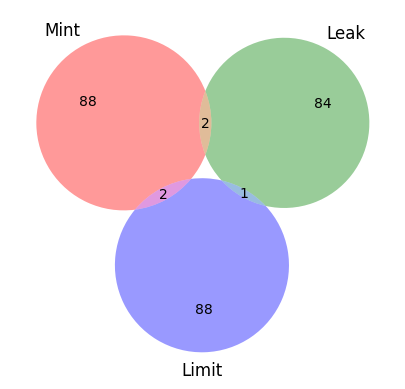

In [37]:
venn3([set(mint_df['Address']), set(leak_df['Address']), set(limit_df['Address'])], ('Mint', 'Leak', 'Limit'))

In [38]:
merged_df = pd.merge(mint_df, leak_df, on='Address', how='outer')
merged_df = pd.merge(merged_df, limit_df, on='Address', how='outer')
merged_df = merged_df.fillna(-1)
merged_df[crpwarner_labels] = merged_df[crpwarner_labels].astype(int)
merged_df.to_csv(os.path.join(TMP_PATH, 'crp_large_sample.csv'), index=False)

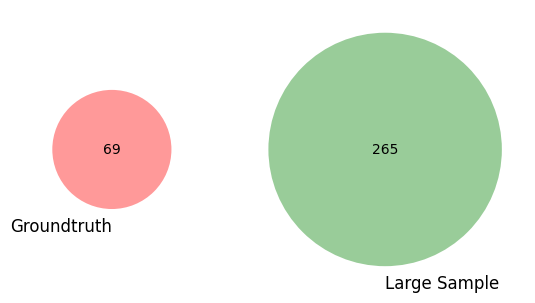

In [39]:
venn2([set(crp_ground_df['Address']), set(merged_df['Address'])], ('Groundtruth', 'Large Sample'))

### RPHunter

#### Total

In [40]:
rphunter_total_df.head()

,Project Name,Chain,Address,Open Source,Sale Restrict,Variable Manipulation,Balance Tamper,Source
0,GMETA,BSC,0X93023F1D3525E273F291B6F76D2F5027A39BF302,Yes,NaN,Modifiable Tax Rate,Hidden Mint/Burn,https://twitter.com/BeosinAlert/status/1681240...
1,PokémonFi,BSC,0X2753DCE37A7EDB052A77832039BCC9AA49AD8B25,Yes,Address Restrict,NaN,NaN,https://twitter.com/CertiKAlert/status/1562555...
2,PokémonFi,BSC,0X0AA5CAE4D1C9230543542E998E04EA795EEDF738,Yes,Address Restrict,NaN,NaN,https://twitter.com/CertiKAlert/status/1562555...
3,Sudorare,ETH,0X5404EFAFDD8CC30053069DF2A1B0C4BA881B3E1E,Yes,NaN,NaN,Hidden Mint/Burn,https://x.com/PeckShieldAlert/status/156196749...
4,DRAC Network,ETH,0X10F6F2B97F3AB29583D9D38BABF2994DF7220C21,Yes,NaN,Modifiable Tax Rate,Hidden Mint/Burn,https://twitter.com/PeckShieldAlert/status/155...


In [41]:
rphunter_total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Project Name           1047 non-null   object
 1   Chain                  1046 non-null   object
 2   Address                1035 non-null   object
 3   Open Source            1047 non-null   object
 4   Sale Restrict          291 non-null    object
 5   Variable Manipulation  160 non-null    object
 6   Balance Tamper         436 non-null    object
 7   Source                 1046 non-null   object
dtypes: object(8)
memory usage: 65.6+ KB


In [42]:
rphunter_total_df.describe()

,Project Name,Chain,Address,Open Source,Sale Restrict,Variable Manipulation,Balance Tamper,Source
count,1047,1046,1035,1047,291,160,436,1046
unique,1029,15,1035,2,15,10,9,1025
top,IDO rug pulls,BSC,0xD2fC424fF0196c3Fb2b3D2A3b29dDEe94e025aee,Yes,Address Restrict,Modifiable Tax Rate,Hidden Mint/Burn,https://hacked.slowmist.io/search/
freq,5,522,1,916,140,80,334,6


#### Experiment

In [43]:
rphunter_experiment_df.head()

,Project Name,Chain,Address,Open Source,Sale Restrict,Variable Manipulation,Balance Tamper,Source
0,GMETA,BSC,0X93023F1D3525E273F291B6F76D2F5027A39BF302,Yes,NaN,Modifiable Tax Rate,Hidden Mint/Burn,https://twitter.com/BeosinAlert/status/1681240...
1,Sudorare,ETH,0X5404EFAFDD8CC30053069DF2A1B0C4BA881B3E1E,Yes,NaN,NaN,Hidden Mint/Burn,https://x.com/PeckShieldAlert/status/156196749...
2,DRAC Network,ETH,0X10F6F2B97F3AB29583D9D38BABF2994DF7220C21,Yes,NaN,Modifiable Tax Rate,Hidden Mint/Burn,https://twitter.com/PeckShieldAlert/status/155...
3,DHE,BSC,0X11CBC781DADAAD13FC3A361772C80B1C027820AF,Yes,Address Restrict,NaN,NaN,https://twitter.com/CertiKAlert/status/1539031...
4,ElonMVP,BSC,0X3E597EA168A85AA2AE5E2C4333665BCD875ED10F,Yes,Address Restrict,NaN,NaN,https://twitter.com/PeckShieldAlert/status/153...


In [44]:
rphunter_experiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Project Name           645 non-null    object
 1   Chain                  645 non-null    object
 2   Address                645 non-null    object
 3   Open Source            645 non-null    object
 4   Sale Restrict          204 non-null    object
 5   Variable Manipulation  145 non-null    object
 6   Balance Tamper         190 non-null    object
 7   Source                 644 non-null    object
dtypes: object(8)
memory usage: 40.4+ KB


In [45]:
rphunter_experiment_df.describe()

,Project Name,Chain,Address,Open Source,Sale Restrict,Variable Manipulation,Balance Tamper,Source
count,645,645,645,645,204,145,190,644
unique,638,7,645,2,14,10,7,631
top,Apache NFT SalesRoom,BSC,0xabe776435f7459e2f5ba773bfb753ed19a053dd0,Yes,Address Restrict,Modifiable Tax Rate,Hidden Mint/Burn,https://hacked.slowmist.io/search/
freq,2,324,1,643,92,69,132,6


#### Merge Total & Experiment

In [46]:
rphunter_total_df['Address'] = rphunter_total_df['Address'].str.lower()
rphunter_experiment_df['Address'] = rphunter_experiment_df['Address'].str.lower()
rphunter_df = pd.concat([rphunter_total_df, rphunter_experiment_df])

In [47]:
rphunter_df.head()

,Project Name,Chain,Address,Open Source,Sale Restrict,Variable Manipulation,Balance Tamper,Source
0,GMETA,BSC,0x93023f1d3525e273f291b6f76d2f5027a39bf302,Yes,NaN,Modifiable Tax Rate,Hidden Mint/Burn,https://twitter.com/BeosinAlert/status/1681240...
1,PokémonFi,BSC,0x2753dce37a7edb052a77832039bcc9aa49ad8b25,Yes,Address Restrict,NaN,NaN,https://twitter.com/CertiKAlert/status/1562555...
2,PokémonFi,BSC,0x0aa5cae4d1c9230543542e998e04ea795eedf738,Yes,Address Restrict,NaN,NaN,https://twitter.com/CertiKAlert/status/1562555...
3,Sudorare,ETH,0x5404efafdd8cc30053069df2a1b0c4ba881b3e1e,Yes,NaN,NaN,Hidden Mint/Burn,https://x.com/PeckShieldAlert/status/156196749...
4,DRAC Network,ETH,0x10f6f2b97f3ab29583d9d38babf2994df7220c21,Yes,NaN,Modifiable Tax Rate,Hidden Mint/Burn,https://twitter.com/PeckShieldAlert/status/155...


In [48]:
rphunter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1692 entries, 0 to 644
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Project Name           1692 non-null   object
 1   Chain                  1691 non-null   object
 2   Address                1680 non-null   object
 3   Open Source            1692 non-null   object
 4   Sale Restrict          495 non-null    object
 5   Variable Manipulation  305 non-null    object
 6   Balance Tamper         626 non-null    object
 7   Source                 1690 non-null   object
dtypes: object(8)
memory usage: 119.0+ KB


In [49]:
rphunter_df.duplicated().sum()

584

In [50]:
rphunter_df = rphunter_df.drop_duplicates(keep='first')

#### Distribution

##### Chain

In [51]:
rphunter_df['Chain'].value_counts()

Chain
BSC          545
ETH          440
Polygon       84
Arbitrum      11
Fantom        11
Avax           4
BASE           2
AVAX           2
KuCoin         2
Cchain         1
OP.ETH         1
SnowTrace      1
Heco           1
Cronos         1
Blast          1
Name: count, dtype: int64

##### Open Source

In [52]:
rphunter_df['Open Source'].value_counts()

Open Source
Yes    979
No     129
Name: count, dtype: int64

##### Sale Restrict

In [53]:
rphunter_df['Sale Restrict'].value_counts()

Sale Restrict
Address Restrict                                           147
Amount Restrict                                             93
Address Restrict,Amount Restrict                            38
Address Restrict,TimeStamp Restrict                          7
Address Restrict,Amount Restrict,TimeStamp Restrict          4
\nAddress Restrict,Amount Restrict                           4
TimeStamp Restrict                                           2
\nAddress Restrict                                           2
Amount Restrict,TimeStamp Restrict                           1
Modifiable External Call                                     1
Address Restrict                                             1
Address Restrict,Address Restrict*3                          1
\n\nAddress Restrict,Amount Restrict,TimeStamp Restrict      1
\nAmount Restrict                                            1
TimeStanp Restrict                                           1
Name: count, dtype: int64

##### Variable Manipulation

In [54]:
rphunter_df['Variable Manipulation'].value_counts()

Variable Manipulation
Modifiable Tax Rate                                   87
Modifiable External Call                              46
Modifiable Tax Address                                18
Modifiable Tax Rate,Modifiable Tax Address             6
Modifibale Tax Rate                                    4
\nModifiable Tax Rate                                  2
Modifuable Tax Rate                                    1
Modifibale Tax Rate,Modifiable Tax Address             1
Modifiable Tax Address,Hidden Balance Modification     1
\n                                                     1
Modifiable Tax Address,Hidden Balance Modify           1
Name: count, dtype: int64

##### Balance Tamper

In [55]:
rphunter_df['Balance Tamper'].value_counts()

Balance Tamper
Hidden Mint/Burn                                  334
Hidden Balance Modification                        54
Hidden Balance Modify                              46
\nHidden Mint/Burn                                 35
Hidden Mint/Burn,Hidden Balance Modification        6
Hidden Mint/Burn,Hidden Balance Modify              5
\n\nHidden Mint/Burn                                2
\n                                                  2
Hidden Mint/Eurn                                    1
Hidden Mint/Burn茂录聦Hidden Balance Modification      1
\n\n                                                1
Hidden Mint/Burn脙炉脗录脗聦Hidden Balance Modify         1
Name: count, dtype: int64

#### Cleaning

In [56]:
empty_cond = rphunter_df['Balance Tamper'].isna() & rphunter_df['Variable Manipulation'].isna() & rphunter_df['Sale Restrict'].isna()
rphunter_df = rphunter_df[~empty_cond]
rphunter_df.dropna(subset=['Address'], inplace=True)

In [57]:
rphunter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 407
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Project Name           742 non-null    object
 1   Chain                  742 non-null    object
 2   Address                742 non-null    object
 3   Open Source            742 non-null    object
 4   Sale Restrict          304 non-null    object
 5   Variable Manipulation  168 non-null    object
 6   Balance Tamper         488 non-null    object
 7   Source                 742 non-null    object
dtypes: object(8)
memory usage: 52.2+ KB


#### Encode Label

##### Balance Tamper

In [58]:
def clean_balance_tamper(value):
    if pd.isna(value):
        return ''

    # Strip whitespace and linebreaks
    value = value.strip()

    # Replace multiple linebreaks or strange characters with a comma
    value = re.sub(r'[\n\r]+', ',', value)
    value = re.sub(r'[茂录聦]', ',', value)  # Remove strange unicode artifacts
    value = re.sub(r'[脙炉脗录脗聦]', ',', value)  # Remove strange unicode artifacts

    # Correct known typos
    value = value.replace("Hidden Mint/Eurn", "Hidden Mint/Burn")
    value = value.replace("Hidden Balance Modify", "Hidden Balance Modification")

    # Split by comma and normalize each part
    parts = [p.strip() for p in value.split(',') if p.strip()]

    # Deduplicate and sort for consistency
    parts = sorted(set(parts))

    return list(set(parts))

rphunter_df['Balance Tamper'] = rphunter_df['Balance Tamper'].apply(clean_balance_tamper)

# Optional: show cleaned value counts
mlb = MultiLabelBinarizer()
tamper_encoded = pd.DataFrame(mlb.fit_transform(rphunter_df['Balance Tamper']),
                              columns=mlb.classes_,
                              index=rphunter_df.index)

rphunter_df = pd.concat([rphunter_df.drop(columns=['Balance Tamper']), tamper_encoded], axis=1)
rphunter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 407
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Project Name                 742 non-null    object
 1   Chain                        742 non-null    object
 2   Address                      742 non-null    object
 3   Open Source                  742 non-null    object
 4   Sale Restrict                304 non-null    object
 5   Variable Manipulation        168 non-null    object
 6   Source                       742 non-null    object
 7   Hidden Balance Modification  742 non-null    int64 
 8   Hidden Mint/Burn             742 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 58.0+ KB


##### Sale Restrict

In [59]:
def extract_sale_restrict_labels(value):
    if pd.isna(value) or not str(value).strip():
        return []

    value = re.sub(r'[\n\r]+', ',', value)

    # Fix known typos
    value = value.replace("TimeStanp Restrict", "TimeStamp Restrict")

    # Remove suffix like "*3" (e.g. Address Restrict*3)
    value = re.sub(r'\*[\d]+', '', value)

    # Split and clean
    parts = [p.strip() for p in value.split(',') if p.strip()]

    # Normalize duplicates
    parts = sorted(set(parts))
    return parts

# Apply label extraction
rphunter_df['Sale Restrict'] = rphunter_df['Sale Restrict'].apply(extract_sale_restrict_labels)

# Binarize
mlb_sale = MultiLabelBinarizer()

sale_encoded = pd.DataFrame(mlb_sale.fit_transform(rphunter_df['Sale Restrict']),
                            columns=mlb_sale.classes_,
                            index=rphunter_df.index)

# Drop original and concat
rphunter_df = pd.concat([rphunter_df.drop(columns=['Sale Restrict']), sale_encoded], axis=1)
rphunter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 407
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Project Name                 742 non-null    object
 1   Chain                        742 non-null    object
 2   Address                      742 non-null    object
 3   Open Source                  742 non-null    object
 4   Variable Manipulation        168 non-null    object
 5   Source                       742 non-null    object
 6   Hidden Balance Modification  742 non-null    int64 
 7   Hidden Mint/Burn             742 non-null    int64 
 8   Address Restrict             742 non-null    int64 
 9   Amount Restrict              742 non-null    int64 
 10  Modifiable External Call     742 non-null    int64 
 11  TimeStamp Restrict           742 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 75.4+ KB


##### Variable Manipulation

In [60]:
def extract_variable_manipulation_labels(value):
    if pd.isna(value) or not str(value).strip():
        return []

    value = re.sub(r'[\n\r]+', ',', value)

    # Correct typos
    value = value.replace("Modifibale Tax Rate", "Modifiable Tax Rate")
    value = value.replace("Modifuable Tax Rate", "Modifiable Tax Rate")
    value = value.replace("Hidden Balance Modify", "")  # strip unrelated label

    # Split and clean
    parts = [p.strip() for p in value.split(',') if p.strip()]

    # Deduplicate
    parts = sorted(set(parts))
    return parts

# Apply function
rphunter_df['Variable Manipulation'] = rphunter_df['Variable Manipulation'].apply(extract_variable_manipulation_labels)

# Binarize
mlb_var = MultiLabelBinarizer()
var_encoded = pd.DataFrame(mlb_var.fit_transform(rphunter_df['Variable Manipulation']),
                           columns=mlb_var.classes_,
                           index=rphunter_df.index)

# Merge and drop
rphunter_df = pd.concat([rphunter_df.drop(columns=['Variable Manipulation']), var_encoded], axis=1)
rphunter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 407
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Project Name                 742 non-null    object
 1   Chain                        742 non-null    object
 2   Address                      742 non-null    object
 3   Open Source                  742 non-null    object
 4   Source                       742 non-null    object
 5   Hidden Balance Modification  742 non-null    int64 
 6   Hidden Mint/Burn             742 non-null    int64 
 7   Address Restrict             742 non-null    int64 
 8   Amount Restrict              742 non-null    int64 
 9   Modifiable External Call     742 non-null    int64 
 10  TimeStamp Restrict           742 non-null    int64 
 11  Hidden Balance Modification  742 non-null    int64 
 12  Modifiable External Call     742 non-null    int64 
 13  Modifiable Tax Address       742 non-nul

#### Common with others

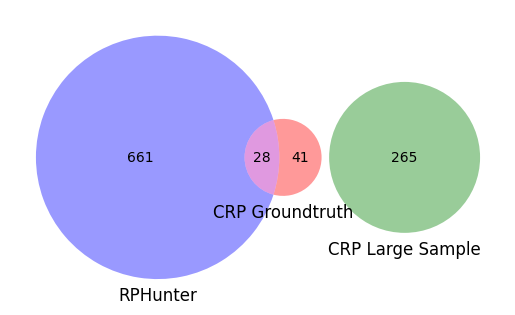

In [61]:
rphunter_df['Address'] = rphunter_df['Address'].str.lower()
venn3([set(crp_ground_df['Address']), set(merged_df['Address']), set(rphunter_df['Address'])], ('CRP Groundtruth', 'CRP Large Sample', 'RPHunter'))

In [62]:
rphunter_df.duplicated().sum()

52

In [63]:
rphunter_df = rphunter_df.drop_duplicates()

In [64]:
# Create masks for common addresses
common_mask = rphunter_df['Address'].isin(set(crp_ground_df['Address']))
sm_common_mask = crp_ground_df['Address'].isin(set(rphunter_df['Address']))

# Extract subsets
merge_with_crp_df = rphunter_df[common_mask].copy()
non_crp_df = rphunter_df[~common_mask].copy()

# Assign matched labels column by column
for col in crpwarner_labels:
    merge_with_crp_df[col] = crp_ground_df.loc[sm_common_mask, col].values
    non_crp_df[col] = -1

# Final counts
len(merge_with_crp_df), len(non_crp_df)

(28, 662)

In [65]:
merge_with_crp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 0 to 312
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Project Name                 28 non-null     object
 1   Chain                        28 non-null     object
 2   Address                      28 non-null     object
 3   Open Source                  28 non-null     object
 4   Source                       28 non-null     object
 5   Hidden Balance Modification  28 non-null     int64 
 6   Hidden Mint/Burn             28 non-null     int64 
 7   Address Restrict             28 non-null     int64 
 8   Amount Restrict              28 non-null     int64 
 9   Modifiable External Call     28 non-null     int64 
 10  TimeStamp Restrict           28 non-null     int64 
 11  Hidden Balance Modification  28 non-null     int64 
 12  Modifiable External Call     28 non-null     int64 
 13  Modifiable Tax Address       28 non-null 

In [66]:
rphunter_df = pd.concat([merge_with_crp_df, non_crp_df])
rphunter_df[crpwarner_labels] = rphunter_df[crpwarner_labels].astype(int)
rphunter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 0 to 86
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Project Name                 690 non-null    object
 1   Chain                        690 non-null    object
 2   Address                      690 non-null    object
 3   Open Source                  690 non-null    object
 4   Source                       690 non-null    object
 5   Hidden Balance Modification  690 non-null    int64 
 6   Hidden Mint/Burn             690 non-null    int64 
 7   Address Restrict             690 non-null    int64 
 8   Amount Restrict              690 non-null    int64 
 9   Modifiable External Call     690 non-null    int64 
 10  TimeStamp Restrict           690 non-null    int64 
 11  Hidden Balance Modification  690 non-null    int64 
 12  Modifiable External Call     690 non-null    int64 
 13  Modifiable Tax Address       690 non-null

In [67]:
rphunter_df.to_csv(os.path.join(TMP_PATH, 'rphunter.csv'))

### Trapdoor

#### insight in each component

In [68]:
trapdoor_verified_df.head()

,address,block_number,name,symbol,decimals,totalSupply,label
0,0x5674d4536fcd7a924696078b15865c4fab9f3597,12266223,Coordinape,CAPE,18,100000000000000000000000,1
1,0xbb7f05aa2dd33425ea0848cda8e4ea54718c6336,12623468,Goblin Town,GOBLIN 🐲,18,10000000100500000000000000000000000000000,1
2,0x801427e0b00c5aa46f96550e1e33ad7f00077e19,11740511,FTX Wrapped AMC,wAMC,18,525000000000000000000000,1
3,0x1b49dc534fa67d0c23f6bd0601f8c8142f8306d0,12213066,FractionalArt,FRCT,18,5000000000000000000000000,1
4,0xf3afd0feac711f754d430de41ec0c7314a397ca1,11862564,Osmosis Zone,OSIS,18,10000000000000000000000000,1


In [69]:
trapdoor_verified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31376 entries, 0 to 31375
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       31376 non-null  object
 1   block_number  31376 non-null  int64 
 2   name          31375 non-null  object
 3   symbol        31373 non-null  object
 4   decimals      31376 non-null  int64 
 5   totalSupply   31376 non-null  object
 6   label         31376 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.7+ MB


In [70]:
trapdoor_verified_df.describe()

,block_number,decimals,label
count,3.137600e+04,31376.000000,31376.000000
mean,1.317200e+07,16.117797,0.380641
std,2.099696e+06,3.925922,0.485552
min,2.621392e+06,0.000000,0.000000
25%,1.141454e+07,18.000000,0.000000
50%,1.276320e+07,18.000000,0.000000
75%,1.525790e+07,18.000000,1.000000
max,1.640392e+07,27.000000,1.000000


In [71]:
trapdoor_opcode_df.head()

,address,PUSH14,AND,CALLER,JUMPI,CALLDATACOPY,PUSH11,DIFFICULTY,CALL,DUP4,...,GASLIMIT,CODESIZE,SHA3,DUP12,OR,PUSH25,CREATE2,EXTCODEHASH,REVERT,label
0,0x5674d4536fcd7a924696078b15865c4fab9f3597,0,243,7,102,4,0,0,0,76,...,2,0,49,1,13,0,0,0,47,1
1,0xbb7f05aa2dd33425ea0848cda8e4ea54718c6336,0,243,7,103,4,0,0,0,72,...,2,0,48,1,13,0,0,0,47,1
2,0x801427e0b00c5aa46f96550e1e33ad7f00077e19,0,243,7,102,4,0,0,0,76,...,2,0,48,1,13,0,0,0,47,1
3,0x1b49dc534fa67d0c23f6bd0601f8c8142f8306d0,0,243,7,102,4,0,0,0,76,...,2,0,48,1,13,0,0,0,48,1
4,0xf3afd0feac711f754d430de41ec0c7314a397ca1,0,243,7,102,4,0,0,0,77,...,2,0,48,1,13,0,0,0,47,1


In [72]:
trapdoor_exchange_df.head()

,address,num_transfers,num_addresses,num_token_transfers,num_creator_transfers,num_burn_transfers,num_mint_transfers,ratio_token_transfers,ratio_creator_transfers,ratio_burn_transfers,...,buyers,sellers,buy_amt,sell_amt,pool_life_time,pool_start_block,pool_end_block,pool_creation_to_swap,token_creation_to_pool_creation,label
0,0x5674d4536fcd7a924696078b15865c4fab9f3597,287,245,0,8,0,10,0.0,0.027875,0.000000,...,238,0,2.986353e+04,0.000000e+00,2159,12266244,12268403,4,21,1
1,0xbb7f05aa2dd33425ea0848cda8e4ea54718c6336,315,241,0,7,1,52,0.0,0.022222,0.003175,...,228,1,1.893184e+15,3.951623e+15,3493146,12623481,16116627,5,13,1
2,0x801427e0b00c5aa46f96550e1e33ad7f00077e19,90,54,0,16,0,11,0.0,0.177778,0.000000,...,42,0,2.648570e+05,0.000000e+00,323,11740528,11740851,4,17,1
3,0x1b49dc534fa67d0c23f6bd0601f8c8142f8306d0,356,334,0,14,0,10,0.0,0.039326,0.000000,...,323,0,2.769972e+06,0.000000e+00,4635,12213422,12218057,7,356,1
4,0xf3afd0feac711f754d430de41ec0c7314a397ca1,374,348,0,10,0,1,0.0,0.026738,0.000000,...,340,0,5.936126e+06,0.000000e+00,1492,11862593,11864085,26,29,1


In [73]:
trapdoor_exchange_df.describe()

,num_transfers,num_addresses,num_token_transfers,num_creator_transfers,num_burn_transfers,num_mint_transfers,ratio_token_transfers,ratio_creator_transfers,ratio_burn_transfers,ratio_mint_transfers,...,buyers,sellers,buy_amt,sell_amt,pool_life_time,pool_start_block,pool_end_block,pool_creation_to_swap,token_creation_to_pool_creation,label
count,4.217200e+04,4.217200e+04,4.217200e+04,42172.000000,4.217200e+04,42172.000000,42172.000000,42172.000000,42172.000000,42172.000000,...,42172.000000,42172.000000,4.217200e+04,4.217200e+04,4.217200e+04,4.217200e+04,4.217200e+04,4.217200e+04,4.217200e+04,42172.000000
mean,2.953730e+03,6.239984e+02,1.017211e+02,25.275017,1.103921e+02,173.407379,0.082903,0.206730,0.018692,0.063903,...,179.127383,40.125249,1.210814e+24,2.636154e+24,4.132315e+05,1.356549e+07,1.397872e+07,5.253356e+03,9.460385e+04,0.539197
std,4.707330e+04,1.294047e+04,7.250391e+03,561.747179,1.139710e+04,6612.825263,0.167673,0.225893,0.065979,0.116046,...,2646.537470,1328.920697,2.431603e+26,4.894057e+26,1.192919e+06,1.935310e+06,1.897293e+06,1.087634e+05,6.094826e+05,0.498467
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000836e+07,1.009384e+07,0.000000e+00,0.000000e+00,0.000000
25%,1.400000e+01,9.000000e+00,0.000000e+00,3.000000,0.000000e+00,1.000000,0.000000,0.038082,0.000000,0.006250,...,5.000000,1.000000,9.541156e+04,3.533144e+02,6.200000e+01,1.177644e+07,1.250990e+07,0.000000e+00,1.000000e+01,0.000000
50%,2.900000e+01,1.900000e+01,0.000000e+00,3.000000,0.000000e+00,1.000000,0.000000,0.130435,0.000000,0.032258,...,13.000000,2.000000,8.521025e+07,7.568078e+06,2.850000e+02,1.352989e+07,1.447668e+07,5.000000e+00,3.300000e+01,1.000000
75%,1.120000e+02,5.100000e+01,2.000000e+00,5.000000,1.000000e+00,1.000000,0.037037,0.285714,0.000072,0.071429,...,36.000000,5.000000,8.391393e+10,1.174934e+10,2.569700e+04,1.549290e+07,1.573272e+07,2.000000e+01,2.612500e+02,1.000000
max,5.288266e+06,1.666062e+06,1.472277e+06,88564.000000,2.321563e+06,870736.000000,1.000000,1.000000,0.890001,1.000000,...,286222.000000,252709.000000,4.992489e+28,1.000000e+29,6.391643e+06,1.640399e+07,1.640399e+07,5.957883e+06,1.143419e+07,1.000000


In [74]:
trapdoor_exchange_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42172 entries, 0 to 42171
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   address                          42172 non-null  object 
 1   num_transfers                    42172 non-null  int64  
 2   num_addresses                    42172 non-null  int64  
 3   num_token_transfers              42172 non-null  int64  
 4   num_creator_transfers            42172 non-null  int64  
 5   num_burn_transfers               42172 non-null  int64  
 6   num_mint_transfers               42172 non-null  int64  
 7   ratio_token_transfers            42172 non-null  float64
 8   ratio_creator_transfers          42172 non-null  float64
 9   ratio_burn_transfers             42172 non-null  float64
 10  ratio_mint_transfers             42172 non-null  float64
 11  skewness_number_buy_sell         42172 non-null  float64
 12  skewness_amt_buy_s

In [75]:
trapdoor_expansion_df.head()

,address,block_number,name,symbol,decimals,totalSupply,label
0,0x0efaf8081a332e6744755c08d0f4698840d01aeb,15794473,THE Space Doge,THESD,8,10000000000000000,1
1,0x7d56ec4d5e6d6dc709e0931d4b437394d362fa36,16095021,FAFO INU,FAFO,9,100000000000000000,1
2,0x0d96ccea237f30aa451f96796994055d78202463,15755529,Dubz Gaming,DUBZ,18,1000000000000000000000000000000,1
3,0x6417624f31eff985a1595c964ff95d844ca2fb07,15348469,Hyakuretsu Ken,Atatatata,9,1000000000000000000,1
4,0x45887c4a6d7f1347fa823dfb3e5a6a342cf5808d,10567310,XAMP DeFi,XAMD,18,10000000000000000000000000,1


In [76]:
trapdoor_expansion_df.describe()

,block_number,decimals,label
count,1.079600e+04,10796.000000,10796.0
mean,1.433951e+07,12.964524,1.0
std,1.952011e+06,4.808875,0.0
min,7.204812e+06,0.000000,1.0
25%,1.322497e+07,9.000000,1.0
50%,1.524638e+07,9.000000,1.0
75%,1.579565e+07,18.000000,1.0
max,1.640399e+07,32.000000,1.0


In [77]:
trapdoor_expansion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10796 entries, 0 to 10795
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       10796 non-null  object
 1   block_number  10796 non-null  int64 
 2   name          10795 non-null  object
 3   symbol        10792 non-null  object
 4   decimals      10796 non-null  int64 
 5   totalSupply   10796 non-null  object
 6   label         10796 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 590.5+ KB


#### Volumn between each components

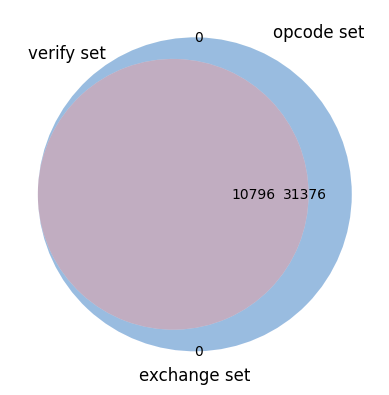

In [78]:
venn3([set(trapdoor_verified_df['address']), set(trapdoor_opcode_df['address']), set(trapdoor_opcode_df['address'])], ('verify set', 'opcode set', 'exchange set'))

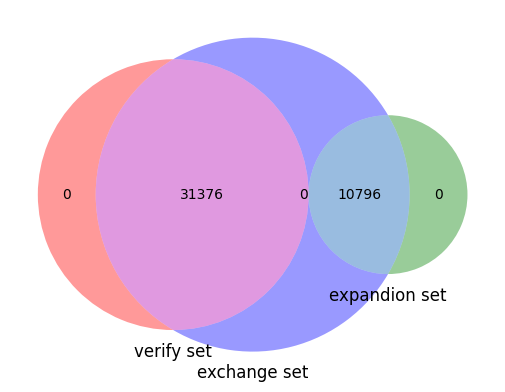

In [79]:
venn3([set(trapdoor_verified_df['address']), set(trapdoor_expansion_df['address']), set(trapdoor_opcode_df['address'])], ('verify set', 'expandion set', 'exchange set'))

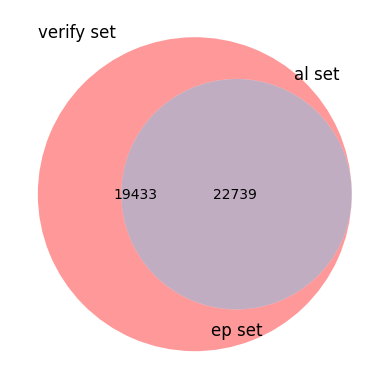

In [80]:
venn3([set(trapdoor_exchange_df['address']), set(trapdoor_al_df['address']), set(trapdoor_ep_df['address'])], ('verify set', 'al set', 'ep set'))

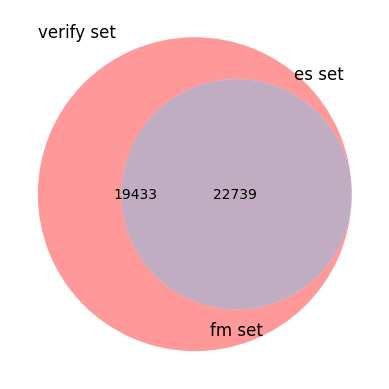

In [81]:
venn3([set(trapdoor_exchange_df['address']), set(trapdoor_es_df['address']), set(trapdoor_fm_df['address'])], ('verify set', 'es set', 'fm set'))

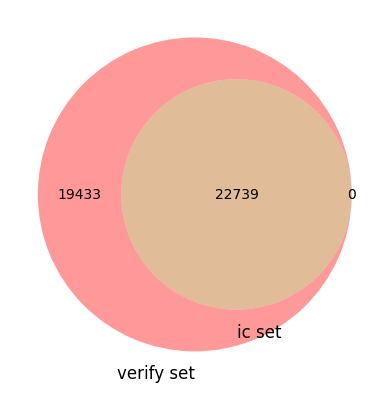

In [82]:
venn2([set(trapdoor_exchange_df['address']), set(trapdoor_ic_df['address'])], ('verify set', 'ic set'))

#### Label Distribution

In [83]:
trapdoor_exchange_df['label'].value_counts()

label
1    22739
0    19433
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

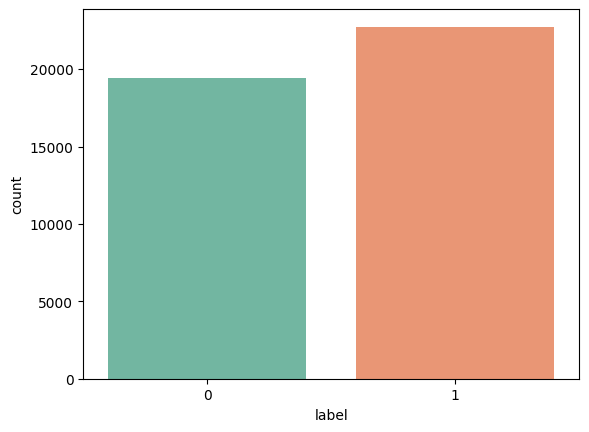

In [84]:
sns.countplot(trapdoor_exchange_df, x='label', palette='Set2')

<Axes: xlabel='label', ylabel='count'>

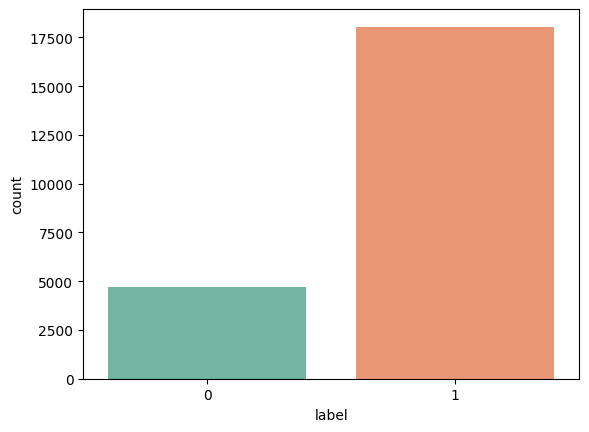

In [85]:
sns.countplot(trapdoor_al_df, x='label', palette='Set2')

<Axes: xlabel='label', ylabel='count'>

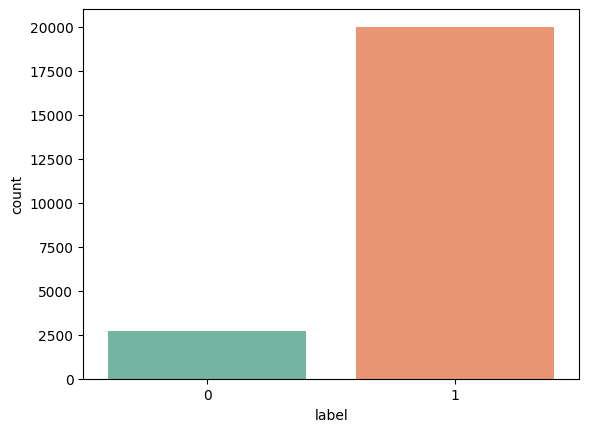

In [86]:
sns.countplot(trapdoor_ep_df, x='label', palette='Set2')

<Axes: xlabel='label', ylabel='count'>

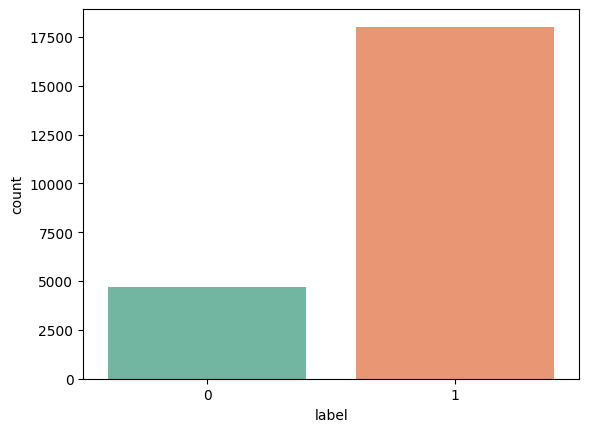

In [87]:
sns.countplot(trapdoor_es_df, x='label', palette='Set2')

<Axes: xlabel='label', ylabel='count'>

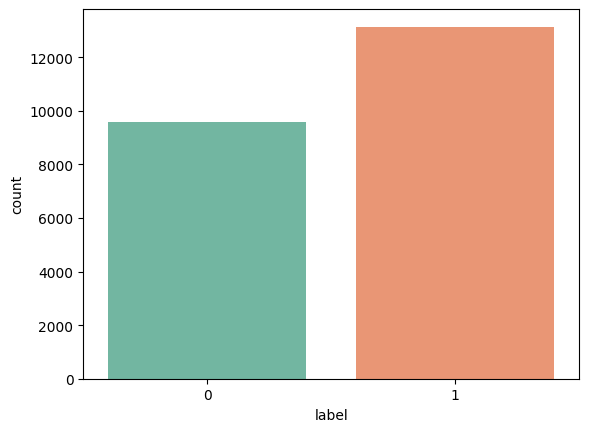

In [88]:
sns.countplot(trapdoor_fm_df, x='label', palette='Set2')

<Axes: xlabel='label', ylabel='count'>

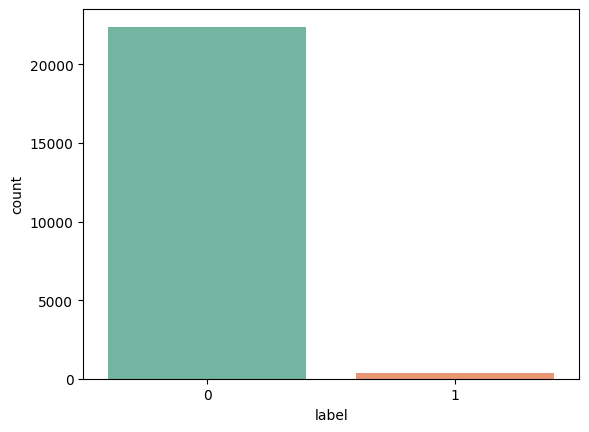

In [89]:
sns.countplot(trapdoor_ic_df, x='label', palette='Set2')

#### Map Labels

In [90]:
df_renamed = trapdoor_exchange_df[['address', 'label']].rename(columns={'label': 'Trapdoor'})
ep_renamed = trapdoor_ep_df[['address', 'label']].rename(columns={'label': 'Exchange Permission'})
es_renamed = trapdoor_es_df[['address', 'label']].rename(columns={'label': 'Exchange Suspension'})
al_renamed = trapdoor_al_df[['address', 'label']].rename(columns={'label': 'Amount Limit'})
fm_renamed = trapdoor_al_df[['address', 'label']].rename(columns={'label': 'Fee Manipulation'})
ic_renamed = trapdoor_ic_df[['address', 'label']].rename(columns={'label': 'Invalid Callback'})

In [91]:
trapdoor_df = df_renamed.merge(ep_renamed, on='address', how='left')
trapdoor_df = trapdoor_df.merge(es_renamed, on='address', how='left')
trapdoor_df = trapdoor_df.merge(al_renamed, on='address', how='left')
trapdoor_df = trapdoor_df.merge(fm_renamed, on='address', how='left')
trapdoor_df = trapdoor_df.merge(ic_renamed, on='address', how='left')
trapdoor_df.head()

,address,Trapdoor,Exchange Permission,Exchange Suspension,Amount Limit,Fee Manipulation,Invalid Callback
0,0x5674d4536fcd7a924696078b15865c4fab9f3597,1,1.0,0.0,0.0,0.0,0.0
1,0xbb7f05aa2dd33425ea0848cda8e4ea54718c6336,1,1.0,0.0,0.0,0.0,0.0
2,0x801427e0b00c5aa46f96550e1e33ad7f00077e19,1,1.0,0.0,0.0,0.0,0.0
3,0x1b49dc534fa67d0c23f6bd0601f8c8142f8306d0,1,1.0,0.0,0.0,0.0,0.0
4,0xf3afd0feac711f754d430de41ec0c7314a397ca1,1,1.0,0.0,0.0,0.0,0.0


In [92]:
trapdoor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42172 entries, 0 to 42171
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   address              42172 non-null  object 
 1   Trapdoor             42172 non-null  int64  
 2   Exchange Permission  22739 non-null  float64
 3   Exchange Suspension  22739 non-null  float64
 4   Amount Limit         22739 non-null  float64
 5   Fee Manipulation     22739 non-null  float64
 6   Invalid Callback     22739 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.3+ MB


In [93]:
trapdoor_df = trapdoor_df.rename(columns={'address': 'Address'})

In [94]:
trapdoor_df[trapdoor_df['Amount Limit'].isna()]

,Address,Trapdoor,Exchange Permission,Exchange Suspension,Amount Limit,Fee Manipulation,Invalid Callback
22739,0x741657bd4b268e4abb39a4a8720454dcb370d533,0,NaN,NaN,NaN,NaN,NaN
22740,0xe2496b97adfc69dcb4631f7b1d7fc975f38f23ce,0,NaN,NaN,NaN,NaN,NaN
22741,0x7f388eadcbd1063acda82492ec6ad06c35759898,0,NaN,NaN,NaN,NaN,NaN
22742,0xd3239cb876ae9d7da7918a3a076cba3b02eda652,0,NaN,NaN,NaN,NaN,NaN
22743,0x1216f986e1524d7875dd76d613a4652e2c23a791,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
42167,0xdf560bb3711731f949896704ace17534b28b83de,0,NaN,NaN,NaN,NaN,NaN
42168,0xc82a80264cec5f5c9fafeeaa0c230a35f3d424a2,0,NaN,NaN,NaN,NaN,NaN
42169,0x68c79931d2431bd7cbaccb24b869ff3ef162615a,0,NaN,NaN,NaN,NaN,NaN
42170,0x33cf48debdcf255b689a7b1d6be5661ec832cc30,0,NaN,NaN,NaN,NaN,NaN


In [95]:
trapdoor_df = trapdoor_df.fillna(0)

In [96]:
cols = trapdoor_df.select_dtypes('float').columns
trapdoor_df[cols] = trapdoor_df[cols].astype('int')

In [97]:
trapdoor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42172 entries, 0 to 42171
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              42172 non-null  object
 1   Trapdoor             42172 non-null  int64 
 2   Exchange Permission  42172 non-null  int64 
 3   Exchange Suspension  42172 non-null  int64 
 4   Amount Limit         42172 non-null  int64 
 5   Fee Manipulation     42172 non-null  int64 
 6   Invalid Callback     42172 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 2.3+ MB


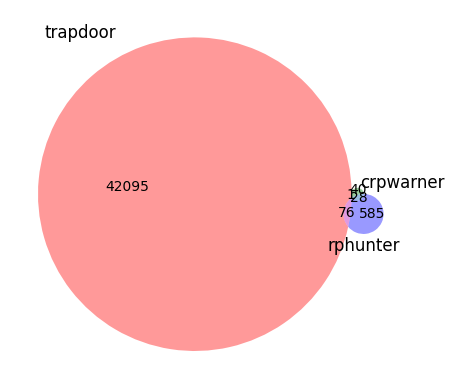

In [98]:
venn3([set(trapdoor_df['Address']), set(crp_ground_df['Address']), set(rphunter_df['Address'])], ('trapdoor', 'crpwarner', 'rphunter'))

#### Export

In [99]:
trapdoor_df.to_csv(os.path.join(TMP_PATH, 'trapdoor.csv'), index=False)